# Load Dataset

In [1]:
import pandas as pd

data = pd.read_csv(r"C:\Users\arman\Desktop\Hotel.csv")
data.head(3)

,hotel,is_canceled,arrival_date_year,arrival_date_month,adults,children,babies,country,reserved_room_type,assigned_room_type,reservation_status,reservation_status_date,room_status,guest_type
0,Resort Hotel,0,2015,July,2,0.0,0,PRT,C,C,Check-Out,7/1/2015,Desired,Couples
1,Resort Hotel,0,2015,July,2,0.0,0,PRT,C,C,Check-Out,7/1/2015,Desired,Couples
2,Resort Hotel,0,2015,July,1,0.0,0,GBR,A,C,Check-Out,7/2/2015,Un-Desired,Single


# Remove Columns...

In [2]:
data.shape

(119390, 14)

In [3]:
data.keys()

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'adults', 'children', 'babies', 'country', 'reserved_room_type',
       'assigned_room_type', 'reservation_status', 'reservation_status_date',
       'room_status', 'guest_type'],
      dtype='object')

In [4]:
data = data.drop(columns=['adults','children','babies','reserved_room_type','assigned_room_type','reservation_status_date'])
data.head(4)

,hotel,is_canceled,arrival_date_year,arrival_date_month,country,reservation_status,room_status,guest_type
0,Resort Hotel,0,2015,July,PRT,Check-Out,Desired,Couples
1,Resort Hotel,0,2015,July,PRT,Check-Out,Desired,Couples
2,Resort Hotel,0,2015,July,GBR,Check-Out,Un-Desired,Single
3,Resort Hotel,0,2015,July,GBR,Check-Out,Desired,Single


# Fill NULL Values...

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   hotel               119390 non-null  object
 1   is_canceled         119390 non-null  int64 
 2   arrival_date_year   119390 non-null  int64 
 3   arrival_date_month  119390 non-null  object
 4   country             118902 non-null  object
 5   reservation_status  119390 non-null  object
 6   room_status         119390 non-null  object
 7   guest_type          119390 non-null  object
dtypes: int64(2), object(6)
memory usage: 7.3+ MB


In [6]:
data["country"].fillna(data["country"].mode()[0], inplace=True)

C:\Users\arman\AppData\Local\Temp\ipykernel_3264\35958573.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["country"].fillna(data["country"].mode()[0], inplace=True)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   hotel               119390 non-null  object
 1   is_canceled         119390 non-null  int64 
 2   arrival_date_year   119390 non-null  int64 
 3   arrival_date_month  119390 non-null  object
 4   country             119390 non-null  object
 5   reservation_status  119390 non-null  object
 6   room_status         119390 non-null  object
 7   guest_type          119390 non-null  object
dtypes: int64(2), object(6)
memory usage: 7.3+ MB


# Change Columns Name...

In [8]:
data.head(3)

,hotel,is_canceled,arrival_date_year,arrival_date_month,country,reservation_status,room_status,guest_type
0,Resort Hotel,0,2015,July,PRT,Check-Out,Desired,Couples
1,Resort Hotel,0,2015,July,PRT,Check-Out,Desired,Couples
2,Resort Hotel,0,2015,July,GBR,Check-Out,Un-Desired,Single


In [9]:
data = data.rename(columns={"arrival_date_year":"arrival_year", "arrival_date_month":"arrival_month"})

# Remove Duplicates...

In [10]:
data.duplicated()

0         False
1          True
2         False
3         False
4         False
          ...  
119385     True
119386     True
119387     True
119388     True
119389     True
Length: 119390, dtype: bool

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.shape

(9852, 8)

In [13]:
data.head(3)

,hotel,is_canceled,arrival_year,arrival_month,country,reservation_status,room_status,guest_type
0,Resort Hotel,0,2015,July,PRT,Check-Out,Desired,Couples
2,Resort Hotel,0,2015,July,GBR,Check-Out,Un-Desired,Single
3,Resort Hotel,0,2015,July,GBR,Check-Out,Desired,Single


# Feature Encoding...

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le_hotel = LabelEncoder()
data["hotel"] = le_hotel.fit_transform(data["hotel"])

In [16]:
le_arrival_month = LabelEncoder()
data["arrival_month"] = le_arrival_month.fit_transform(data["arrival_month"])

In [17]:
le_country = LabelEncoder()
data["country"] = le_country.fit_transform(data["country"])

In [18]:
le_reservation_status = LabelEncoder()
data["reservation_status"] = le_reservation_status.fit_transform(data["reservation_status"])

In [19]:
le_room_status = LabelEncoder()
data["room_status"] = le_room_status.fit_transform(data["room_status"])

In [20]:
le_guest_type = LabelEncoder()
data["guest_type"] = le_guest_type.fit_transform(data["guest_type"])

In [21]:
data.head(3)

,hotel,is_canceled,arrival_year,arrival_month,country,reservation_status,room_status,guest_type
0,1,0,2015,5,135,1,0,0
2,1,0,2015,5,59,1,1,2
3,1,0,2015,5,59,1,0,2


# Check Outliers

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

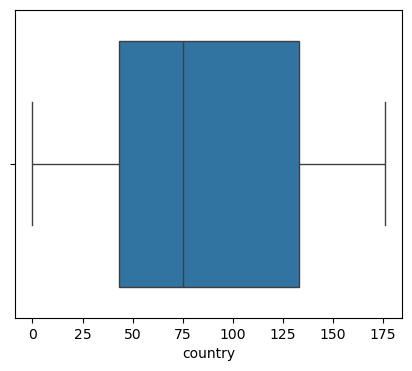

In [23]:
plt.figure(figsize=(5,4))
sns.boxplot(x = "country", data = data)
plt.show()

# To check correlations...

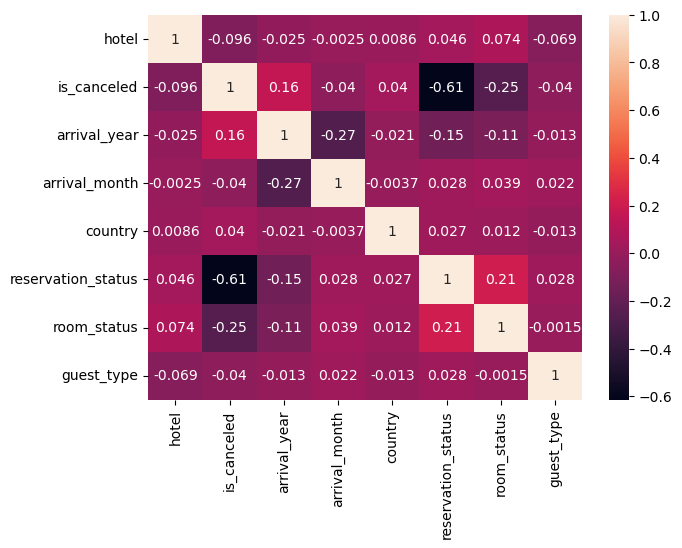

In [24]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

# Feature Scalling...

In [25]:
x = data.drop(columns="is_canceled")
y = data['is_canceled']

In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(x)

x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x.head(4)

,hotel,arrival_year,arrival_month,country,reservation_status,room_status,guest_type
0,1.350157,-1.809741,-0.102786,1.107217,0.437298,-0.577194,-0.956264
1,1.350157,-1.809741,-0.102786,-0.436947,0.437298,1.732520,1.454153
2,1.350157,-1.809741,-0.102786,-0.436947,0.437298,-0.577194,1.454153
3,1.350157,-1.809741,-0.102786,-0.436947,0.437298,-0.577194,-0.956264


# Input Output Spliting...

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=52)

# Model Applying...

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier

In [29]:
sv = SVC(kernel='poly')
sv.fit(x_train,y_train)
sv.score(x_test,y_test)*100 , sv.score(x_train,y_train)*100

(99.84779299847793, 99.35287400076133)

In [30]:
dc = DecisionTreeClassifier(max_depth=6)
dc.fit(x_train,y_train)
dc.score(x_test,y_test)*100 , dc.score(x_train,y_train)*100

(100.0, 100.0)

# Confusion Metrix...

In [31]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [32]:
# Compute confusion matrix
cf = confusion_matrix(y_test, dc.predict(x_test))
cf

array([[1307,    0],
       [   0,  664]], dtype=int64)

In [33]:
precision_score(y_test, dc.predict(x_test))*100

100.0

In [34]:
recall_score(y_test, dc.predict(x_test))*100

100.0

In [35]:
f1_score(y_test, dc.predict(x_test))*100

100.0

# To check errors...

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_squared_error(y_test, dc.predict(x_test)) , mean_absolute_error(y_test, dc.predict(x_test))

(0.0, 0.0)

# Model Prediction...

In [37]:
# Real Value...

y_test.head()

25562    0
38990    0
8236     1
26469    0
50205    0
Name: is_canceled, dtype: int64

In [38]:
dc.predict([[1.350157,-0.324563,1.643152,-0.233768,-1.445683,-0.577194,-0.956264]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [39]:
x_test.head()

,hotel,arrival_year,arrival_month,country,reservation_status,room_status,guest_type
2277,1.350157,-0.324563,-0.102786,-1.615389,0.437298,-0.577194,0.248944
3402,1.350157,1.160616,-1.266744,-0.599491,0.437298,-0.577194,0.248944
873,1.350157,-0.324563,1.643152,-0.233768,-1.445683,-0.577194,-0.956264
2356,1.350157,-0.324563,-0.102786,1.310397,0.437298,1.732520,-0.956264
4646,-0.740655,-0.324563,-1.557734,1.208807,0.437298,-0.577194,-0.956264
